In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
from glob import glob

In [2]:
ext = "*.csv"
path = "dataset/archive/images/train/"

all_csv_files = {}
counter = 0
global_subdir = ''

def build_file_paths(files, path, subdir):
    new_files = []
    for file in files:
        new_files.append(path+'/'+file)
    
    return new_files

for path, subdir, file in os.walk(path):
#     print('path:', path)
#     print('subdir:', subdir)
#     print('file:', file)
    if counter == 0:
        global_subdir = subdir
    else:
        expression = global_subdir[counter-1]
        file = build_file_paths(file, path, expression)
        all_csv_files[expression] = file
        
    counter += 1
#     for file in glob(os.path.join(path, ext)):
#         all_csv_files[global_subdir[counter]] = file

# all_csv_files = [file
#                  for path, subdir, files in os.walk(path)
#                  for file in glob(os.path.join(path, ext))]


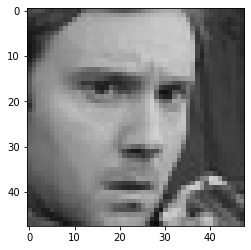

In [3]:
image = cv2.imread(all_csv_files['angry'][0])

plt.imshow(image)
plt.show()

In [4]:
from skimage.feature import local_binary_pattern
import numpy as np


# class LocalBinaryPatterns:
#     def __init__(self, num_points, radius):
#         self.num_points = num_points * radius
#         self.radius = radius
        
#     def describe(self, image, eps=1e-7):
#         lbp = feature.local_binary_pattern(image, self.num_points, self.radius, method="radius")
#         (hist, _) = np.histogram(lbp.ravel(), bins= np.arange(0, self.num_points + 3), range=(0, self.num_points + 2))
        
        
#         plt.imshow(lbp)
#         plt.show()
        
#         hist = hist.astype("float")
#         hist /= (hist.sum() + eps)
        
#         return hist

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

radius = 1
n_points = 8 * radius
lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 2), range=(0, n_points + 2))
hist = hist.astype('float')
hist /= (hist.sum() + 1e-7)
hist = hist[:-1]

    
features = hist
# lbp = LocalBinaryPatterns(24, 8)

# hist = lbp.describe(gray)

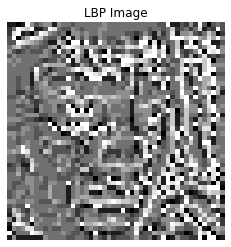

In [5]:
# display the LBP image
plt.imshow(lbp, cmap='gray')
plt.title('LBP Image')
plt.axis('off')
plt.show()

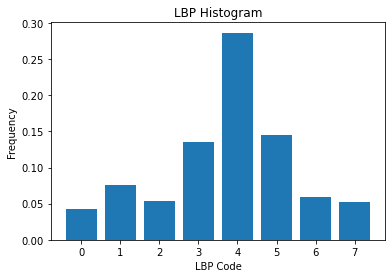

In [6]:
# display the histogram
plt.bar(np.arange(0, n_points), hist, width=0.8)
plt.title('LBP Histogram')
plt.xlabel('LBP Code')
plt.ylabel('Frequency')
plt.show()

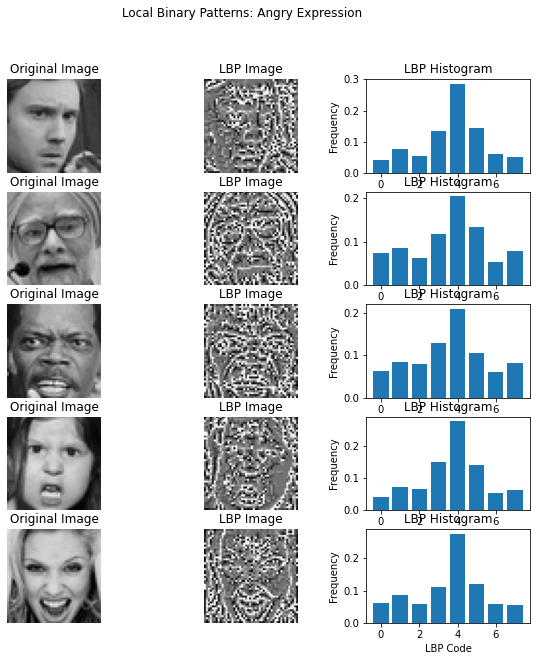

In [7]:
num_images = 5

# Create the subplots
# figs, axs = []
# for i in range(0, len(all_csv_files.keys()):
#     fig, ax = plt.subplots(nrows=len(num_images), ncols=2, figsize=(10, 10))
#     figs.append(fig)
#     axs.append(ax)

fig, ax = plt.subplots(nrows=num_images, ncols=3, figsize=(10, 10))
# figs.append(fig)
               
subplot_ctr = 0
               
# for key in all_csv_files.keys():
for i in range(0, num_images):
    img = cv2.imread(all_csv_files['angry'][i])
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Calculate the LBP image and histogram
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 2), range=(0, n_points + 2))
    hist = hist.astype('float')
    hist /= (hist.sum() + 1e-7)
    hist = hist[:-1]
    
    ax[i, 0].imshow(img, cmap='gray')
    ax[i, 0].set_title('Original Image')
    ax[i, 0].axis('off')


    # Display the LBP image
    ax[i, 1].imshow(lbp, cmap='gray')
    ax[i, 1].set_title('LBP Image')
    ax[i, 1].axis('off')

    # Display the LBP histogram
    ax[i, 2].bar(np.arange(0, n_points), hist, width=0.8)
    ax[i, 2].set_title('LBP Histogram')
    ax[i, 2].set_xlabel('LBP Code')
    ax[i, 2].set_ylabel('Frequency')

# Set the overall title and display the plot
fig.suptitle('Local Binary Patterns: Angry Expression')
plt.savefig("plot.png")
plt.show()
        

In [8]:
print(list(all_csv_files.keys()))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


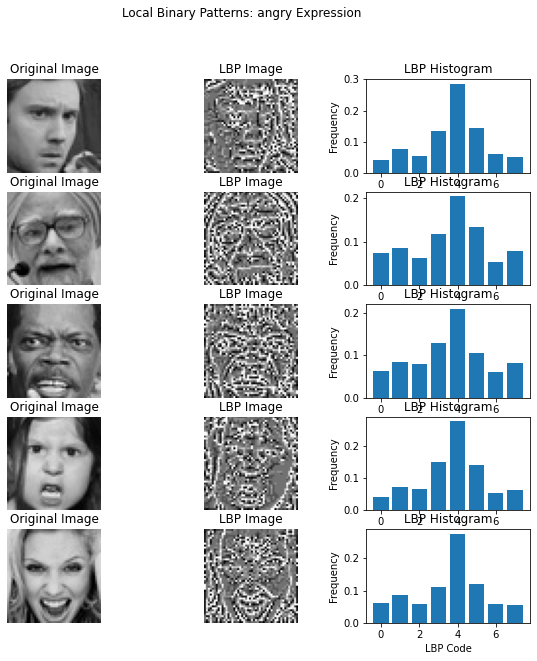

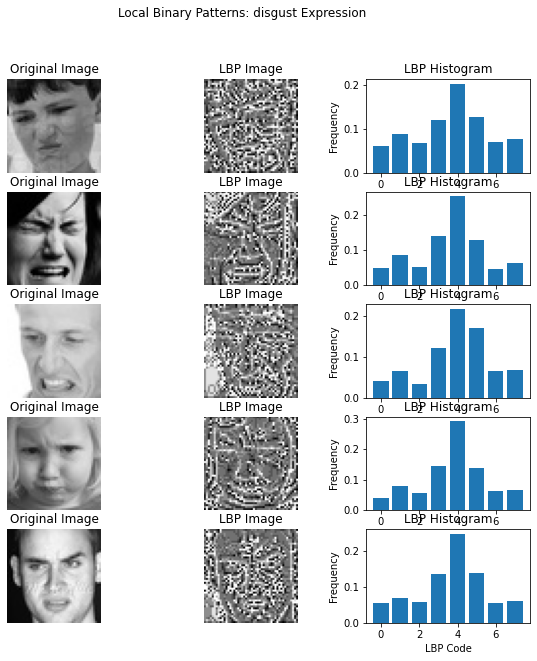

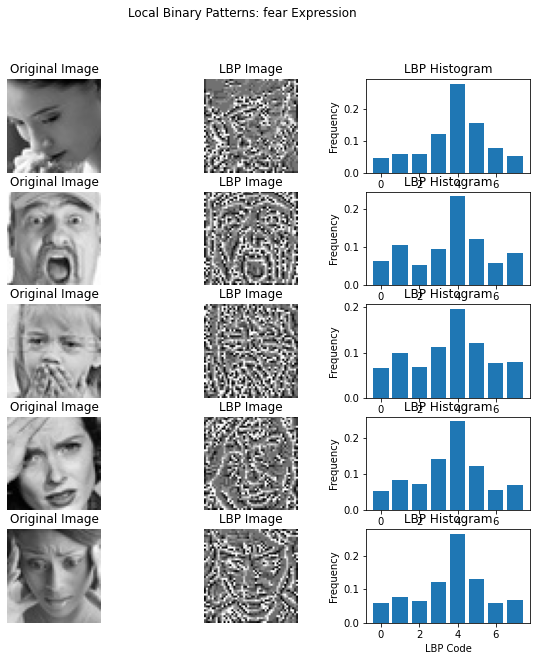

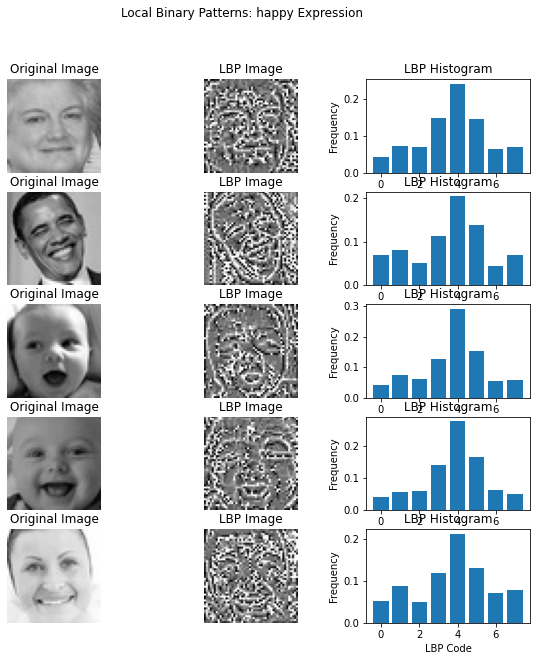

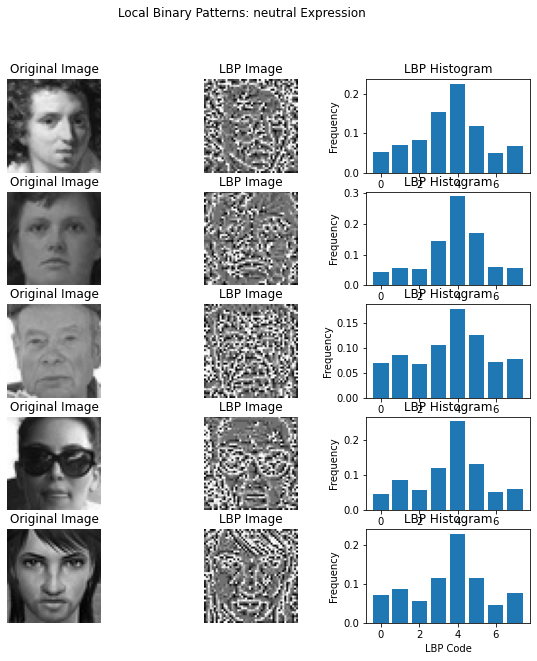

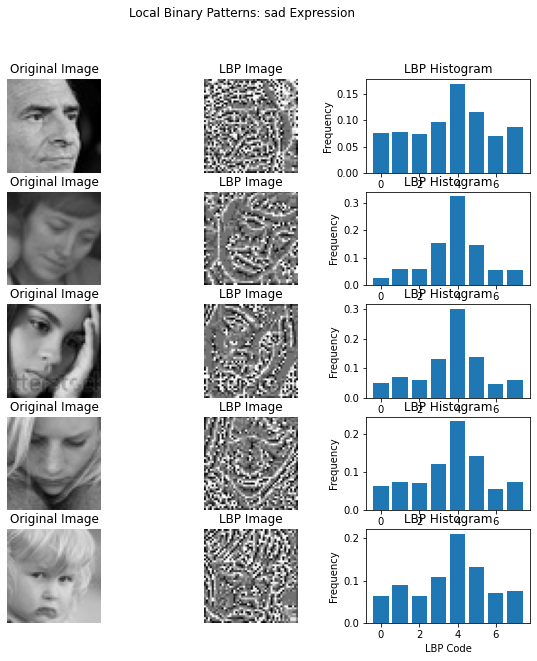

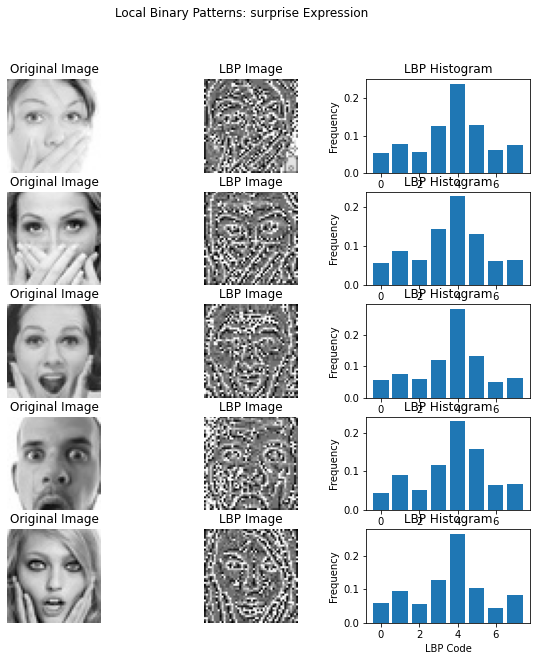

In [9]:
num_images = 5

figs = []
axs = []

data = []
labels = []

for i in range(0, len(list(all_csv_files.keys()))):
    fig, ax = plt.subplots(nrows=num_images, ncols=3, figsize=(10, 10))
    figs.append(fig)
    axs.append(ax)

subplot_ctr = 0
for key in all_csv_files.keys():
    for i in range(0, num_images):
        img = cv2.imread(all_csv_files[key][i])
        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Calculate the LBP image and histogram
        lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 2), range=(0, n_points + 2))
        hist = hist.astype('float')
        hist /= (hist.sum() + 1e-7)
        hist = hist[:-1]
        data.append(hist)
        labels.append(key)

        axs[subplot_ctr][i, 0].imshow(img, cmap='gray')
        axs[subplot_ctr][i, 0].set_title('Original Image')
        axs[subplot_ctr][i, 0].axis('off')


        # Display the LBP image
        axs[subplot_ctr][i, 1].imshow(lbp, cmap='gray')
        axs[subplot_ctr][i, 1].set_title('LBP Image')
        axs[subplot_ctr][i, 1].axis('off')

        # Display the LBP histogram
        axs[subplot_ctr][i, 2].bar(np.arange(0, n_points), hist, width=0.8)
        axs[subplot_ctr][i, 2].set_title('LBP Histogram')
        axs[subplot_ctr][i, 2].set_xlabel('LBP Code')
        axs[subplot_ctr][i, 2].set_ylabel('Frequency')
    
    # Set the overall title and display the plot
    figs[subplot_ctr].suptitle(f'Local Binary Patterns: {key} Expression')
    subplot_ctr += 1

plt.show()

In [10]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=100.0, random_state = 42)
model.fit(data, labels)

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=100.0, random_state=42)

In [11]:
img = cv2.imread(all_csv_files['angry'][6])

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate the LBP image and histogram
lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 2), range=(0, n_points + 2))
hist = hist.astype('float')
hist /= (hist.sum() + 1e-7)
hist = hist[:-1]

prediction = model.predict(hist.reshape(1, -1))

In [12]:
prediction

array(['neutral'], dtype='<U8')

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

input_shape = (height, width, channels)

NameError: name 'height' is not defined

In [ ]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('model', tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model))
])

In [ ]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(filters, kernel_size, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(units, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
pipeline.fit(train_data, train_labels, model__epochs=num_epochs, model__batch_size=batch_size)

In [ ]:
test_loss, test_acc = pipeline.score(test_data, test_labels)

In [ ]:
predictions = pipeline.predict(new_data)